### Data Description

<img src="https://cdn.kqed.org/wp-content/uploads/sites/35/2014/01/heartattack.png">

**Credits** - Image from Internet

* This database contains `76` attributes, but all published experiments refer to using a subset of `14` of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 

* The `target` field refers to the presence of heart disease in the patient. It is integer valued - 
    - `0` = no/less chance of heart attack
    - `1` = more chance of heart attack


#### Columns

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* target: 0= less chance of heart attack 1= more chance of heart attack

**Source** - [Kaggle website](https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility)

### Neccessary `import`s

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

# style.use('seaborn')

### Read Data

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### `NaN` Check

In [7]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [8]:
def get_nan_location(dframe):
    nan_locs = {}
    for col in dframe.columns:
        nl = list(np.where(dframe[col].isnull())[0])
        nan_locs[col] = nl
    return nan_locs

In [9]:
get_nan_location(dframe=df)

{'age': [],
 'sex': [],
 'cp': [],
 'trestbps': [],
 'chol': [],
 'fbs': [],
 'restecg': [],
 'thalach': [],
 'exang': [],
 'oldpeak': [],
 'slope': [],
 'ca': [],
 'thal': [],
 'target': []}

### `target` → How many people already got Heart Attack

In [10]:
ha_df = df['target'].value_counts().to_frame()
ha_df

,target
1,165
0,138


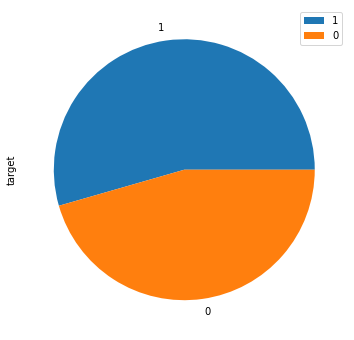

In [11]:
ha_df.plot(kind='pie', figsize=(10, 6), subplots=True)
plt.show()

* Risky → 1
* Safe → 0

The ratio of the people who already got heart attack is more comparitively to the people who have less chance of getting it.

### Sex Ratio

In [12]:
sdf = df['sex'].value_counts().to_frame()
sdf

,sex
1,207
0,96


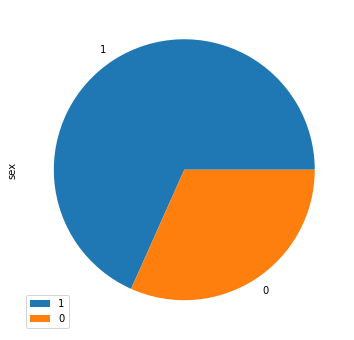

In [13]:
sdf.plot(kind='pie', figsize=(10, 6), subplots=True)
plt.show()

* Males → 1
* Females → 0

It is clear that men are the ones where heart attack is common. It is almost 2 times greater.

### Correlation

In [14]:
cor_df = df.corr()

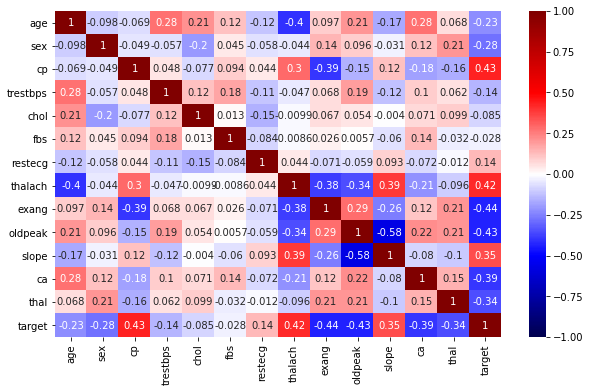

In [15]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    data=cor_df,
    vmin=-1,
    vmax=1,
    center=0,
    cmap='seismic',
    annot=True
)

plt.show()

### Divide based on `target` group

In [16]:
df_1 = df[df['target'] == 1]
df_0 = df[df['target'] == 0]

### Age Group

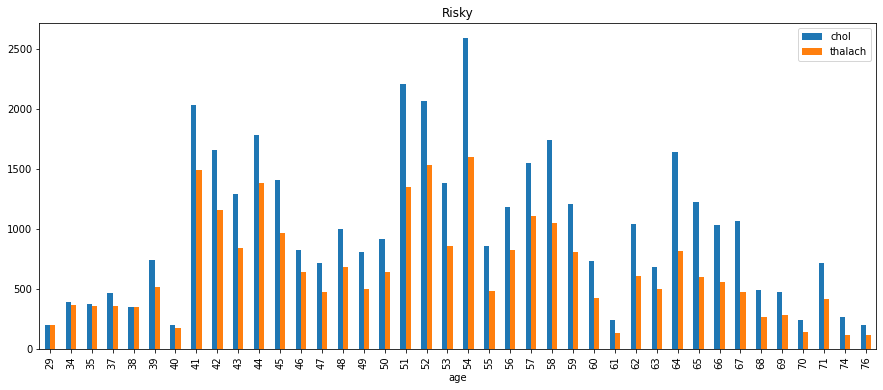

In [17]:
ag_df_1 = df_1.groupby(by=['age'])[['chol', 'thalach']].sum()
ag_df_1.plot(kind='bar', figsize=(15, 6), title='Risky')
plt.show()

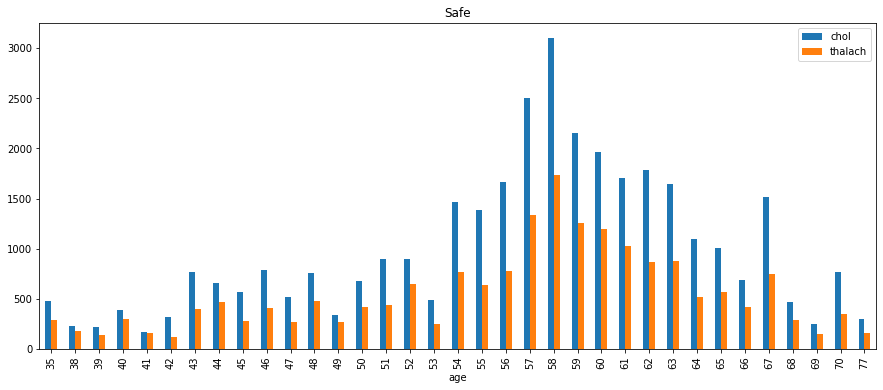

In [18]:
ag_df_0 = df_0.groupby(by=['age'])[['chol', 'thalach']].sum()
ag_df_0.plot(kind='bar', figsize=(15, 6), title='Safe')
plt.show()

### Chest Pain - group by

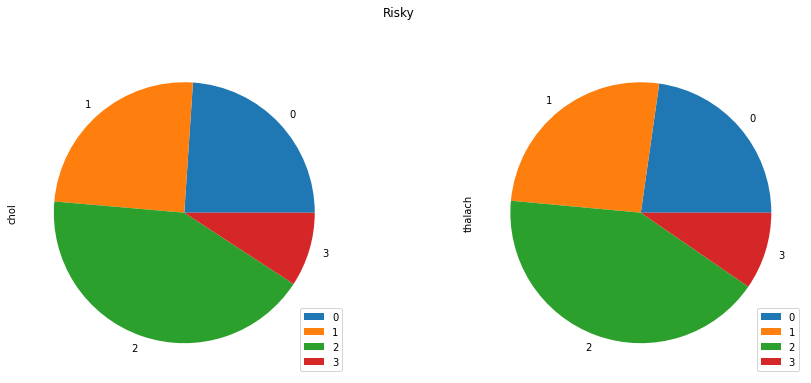

In [19]:
cp_df_1 = df_1.groupby(by=['cp'])[['chol', 'thalach']].sum()
cp_df_1.plot(kind='pie', figsize=(15, 6), subplots=True, title='Risky')
plt.show()

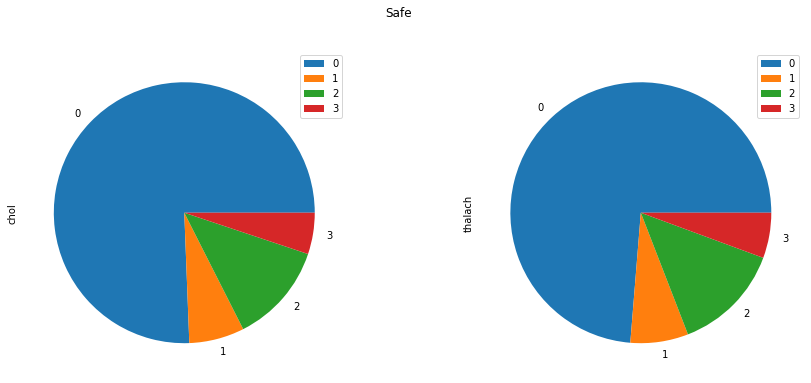

In [20]:
cp_df_0 = df_0.groupby(by=['cp'])[['chol', 'thalach']].sum()
cp_df_0.plot(kind='pie', figsize=(15, 6), subplots=True, title='Safe')
plt.show()

### Role of `cholestrol` in Heart Stroke

`chol` - min and max

In [21]:
df_1['chol'].min()

126

In [22]:
df_1[df_1['chol'] == 126]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1


* From the above table, we can see that `chol` is 126 but the still the person got heart attack.
* The person happens to be a male whose age is 57.
* The `cp` is 2.

In [23]:
df_0['chol'].min()

131

In [24]:
df_0[df_0['chol'] == 131]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


* From the above table, we can see that `chol` is 131 and the person is safe.
* The person happens to be a male whose age is 57.
* The `cp` is 0.

In [25]:
df_1['chol'].max()

564

In [26]:
df_1[df_1['chol'] == 564]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


* From the above table, we can see that `chol` is 564 (the max) and person got the attack.
* The person happens to be female whose age is 67.
* The cp is 2.

In [27]:
df_0['chol'].max()

409

In [28]:
df_0[df_0['chol'] == 409]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


* From the above table, we can see that `chol` is 409 (the max) and the person is safe.
* The person happens to be female whose age is 56.
* The cp is 0.

By observing this, we can say that `cp` is one of the important features.

### Scatter plot - `age` and `chol`

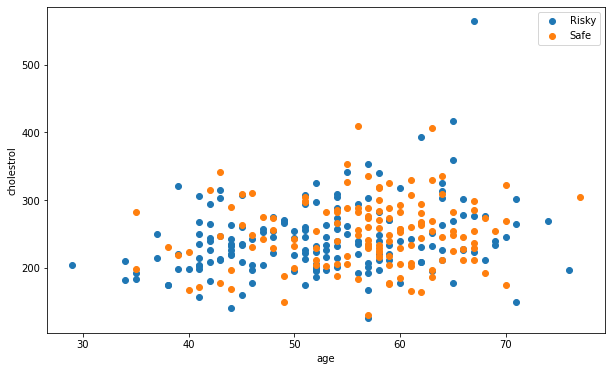

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df_1['age'], df_1['chol'], label='Risky')
plt.scatter(df_0['age'], df_0['chol'], label='Safe')
plt.xlabel('age')
plt.ylabel('cholestrol')
plt.legend()
plt.show()

### Chest Pain - `cp` and Heart Rate - `thalach`

In [30]:
mxh_rate_1 = df_1['thalach'].max()
mih_rate_1 = df_1['thalach'].min()
mxh_rate_0 = df_0['thalach'].max()
mih_rate_0 = df_0['thalach'].min()

In [31]:
print("For 1, the max is → {}".format(mxh_rate_1))
print("For 0, the max is → {}".format(mxh_rate_0))
print('------------')
print("For 1, the min is → {}".format(mih_rate_1))
print("For 0, the min is → {}".format(mih_rate_0))

For 1, the max is → 202
For 0, the max is → 195
------------
For 1, the min is → 96
For 0, the min is → 71


In [32]:
df_1[df_1['thalach'] == mxh_rate_1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


* From the above table, we can see that `thalach` is 202 which is way higher and the person got a stroke.
* The age of the person tends to be lesser (29).
* The `cp` is 1.

In [33]:
df_1[df_1['thalach'] == mih_rate_1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1


* From the above table, we can see that `thalach` is 96 which is optimal but still the person got a stroke.
* The age of the person tends to be 60.
* The `cp` is 2.

What we can observe from this is that `cp`, `age` and `thalach` are the most important features.

In [34]:
df_0[df_0['thalach'] == mxh_rate_0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


* From the above table, we can see that `thalach` is 195 which is higher.
* The age of the person tends to be 54.
* The `cp` is 1.

In [35]:
df_0[df_0['thalach'] == mih_rate_0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


* From the above table, we can see that `thalach` is 71 which is very optimal for person whose age is 67.
* The `cp` is 0.

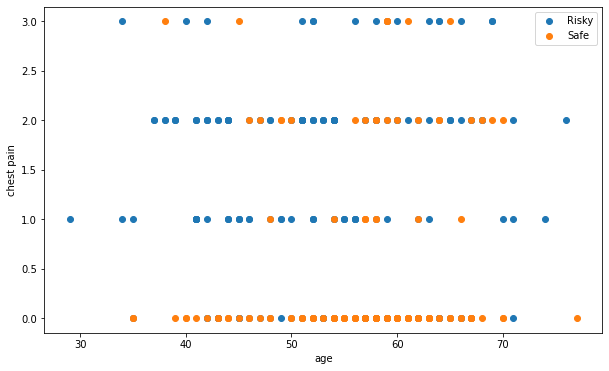

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(df_1['age'], df_1['cp'], label='Risky')
plt.scatter(df_0['age'], df_0['cp'], label='Safe')
plt.xlabel('age')
plt.ylabel('chest pain')
plt.legend()
plt.show()

For a healthy person and healthy heart, irrespective of age the `chest pain` feature tends one of the important.

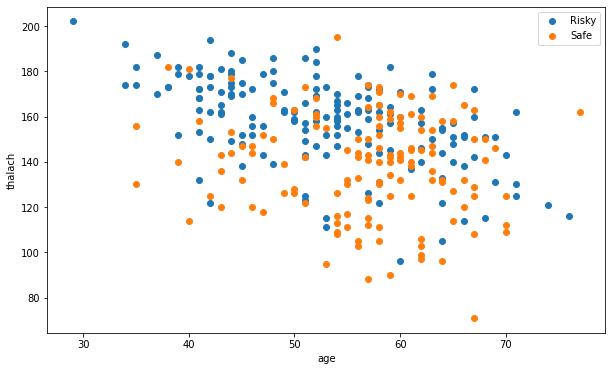

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df_1['age'], df_1['thalach'], label='Risky')
plt.scatter(df_0['age'], df_0['thalach'], label='Safe')
plt.xlabel('age')
plt.ylabel('thalach')
plt.legend()
plt.show()

When comparing the heart rate of two classes, we can see that people in the category of `Safe` - the heart rate is lower than in the people of `Risky` Category. Visually, as per the age we can observe. And it is obvious from the above graph that as the age increases, the heart rate decreases.

### Histogram - column

In [38]:
def plot_histogram(data1, data2, col_name, target_col):
    plt.figure(figsize=(10, 6))
    
    for i in [data1, data2]:
        label = 'Risky' if i[target_col].iloc[0] == 1 else 'Safe'
        plt.hist(i[col_name], label=label, alpha=0.5)
    plt.legend()
    plt.show()
    
    return None

### Density and Histogram - column

In [39]:
def plot_hist_density(data1, data2, col_name, target_col):
    plt.figure(figsize=(10, 6))
    
    for i in [data1, data2]:
        label = 'Risky' if i[target_col].iloc[0] == 1 else 'Safe'
        sns.distplot(i[col_name], hist=True, kde=True, label=label)
    plt.legend()
    plt.show()
    
    return None

### PDF and CDF - column

In [40]:
def plot_pdf_cdf(data1, data2, col_name, target_col):
    plt.figure(figsize=(10, 6))

    for i in [data1, data2]:
        counts, bin_edges = np.histogram(a=i[col_name], bins=10, density=True)
        pdf = counts/sum(counts)
        cdf = np.cumsum(pdf)
        
        label = 'Risky' if i[target_col].iloc[0] == 1 else 'Safe'

        plt.plot(bin_edges[1:], pdf, label='Status {} - pdf'.format(label))
        plt.plot(bin_edges[1:], cdf, label='Status {} - cdf'.format(label))

    plt.xlabel(col_name)
    plt.legend()
    plt.show()
    
    return None

Histogram `thalach`

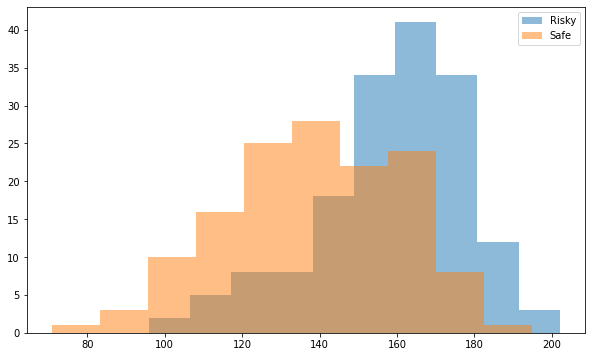

In [41]:
plot_histogram(data1=df_1, data2=df_0, col_name='thalach', target_col='target')

Density and Histogram - `thalach`

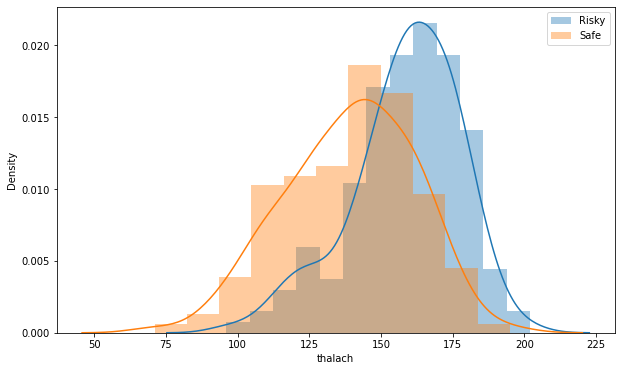

In [42]:
plot_hist_density(data1=df_1, data2=df_0, col_name='thalach', target_col='target')

PDF and CDF - `thalach`

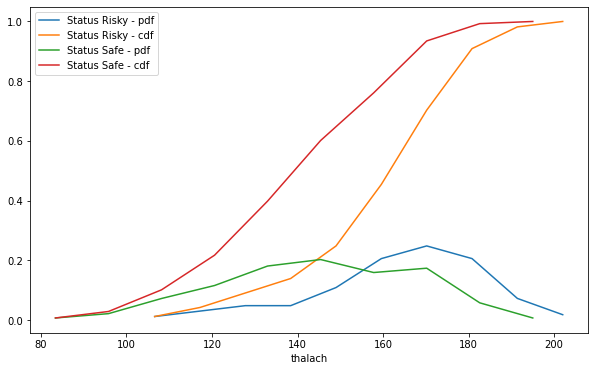

In [43]:
plot_pdf_cdf(data1=df_1, data2=df_0, col_name='thalach', target_col='target')

### Statistical Measurements

**Mean** - (do change when introduced an outlier)

In [44]:
thalach_risky_mean = np.mean(df_1['thalach'])
thalach_safe_mean = np.mean(df_0['thalach'])

print("Risky →", thalach_risky_mean)
print("Safe →", thalach_safe_mean)

Risky → 158.46666666666667
Safe → 139.1014492753623


**Median** (do not reflect when introduced outlier)

In [45]:
thalach_risky_med = np.median(df_1['thalach'])
thalach_safe_med = np.median(df_0['thalach'])

print("Risky →", thalach_risky_med)
print("Safe →", thalach_safe_med)

Risky → 161.0
Safe → 142.0


**Standard deviation** (do reflect when introduced outlier)

In [46]:
thalach_risky_std = np.std(df_1['thalach'])
thalach_safe_std = np.std(df_0['thalach'])

print("Risky →", thalach_risky_std)
print("Safe →", thalach_safe_std)

Risky → 19.116083449928922
Safe → 22.516753780200016


**MAD** - Mean Absolute Deviation

In [47]:
def compute_mad(data, c=0.6745):
    med = np.median(data)
    abs_std = [abs(i - med) for i in data]
    mad = np.median(abs_std) / c
    return round(mad, 2)

In [48]:
print('Risky →', compute_mad(data=df_1['thalach']))
print('Safe →', compute_mad(data=df_0['thalach']))

Risky → 16.31
Safe → 23.72


**Percentile**

In [49]:
def compute_percentile(p, data):
    data = sorted(data)
    
    if (p == 100):
        return data[-1]
    
    l_p = (len(data) - 1) * (p / 100) + 1
    
    int_l_p = int(l_p)
    fl_l_p = l_p - int_l_p
    
    val1 = data[int_l_p - 1]
    val2 = data[int_l_p]    
    pval = val1 + (fl_l_p * (val2 - val1))
    
    return round(pval, 2)

In [50]:
print('--------------')
for d in ['df_1', 'df_0']:
    name = 'Risky' if d == 'df_1' else 'Safe'
    print(name)
    data = eval(d)['thalach'].to_list()
    for i in [0, 25, 75, 90, 95, 100]:
        perc = compute_percentile(p=i, data=data)
        print('\t{} \t→ {}'.format(i, perc))
    print('--------------')

--------------
Risky
	0 	→ 96.0
	25 	→ 149.0
	75 	→ 172.0
	90 	→ 179.6
	95 	→ 184.8
	100 	→ 202
--------------
Safe
	0 	→ 71.0
	25 	→ 125.0
	75 	→ 156.0
	90 	→ 166.6
	95 	→ 173.0
	100 	→ 195
--------------


**IQR**

In [51]:
def get_iqr(data):
    p75 = compute_percentile(p=75, data=data)
    p25 = compute_percentile(p=25, data=data)
    return p75 - p25

In [52]:
print('Risky →', get_iqr(data=df_1['thalach']))
print('Safe →', get_iqr(data=df_0['thalach']))

Risky → 23.0
Safe → 31.0


### Data Visualization

**Box plot**

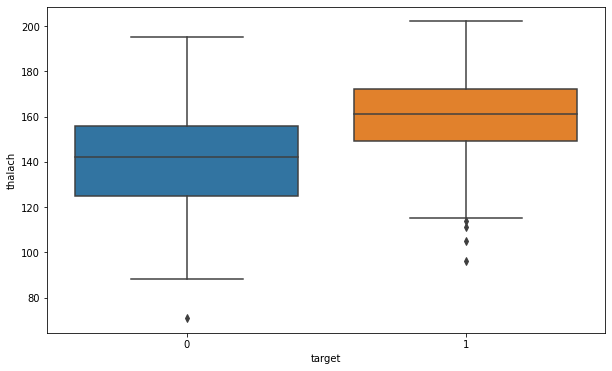

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target',y='thalach', data=df)
plt.show()

**Violin plot**

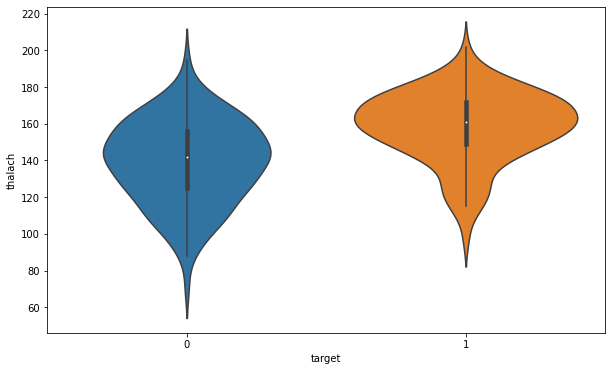

In [54]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='target',y='thalach', data=df)
plt.show()

**Contour plot**

<Figure size 720x432 with 0 Axes>

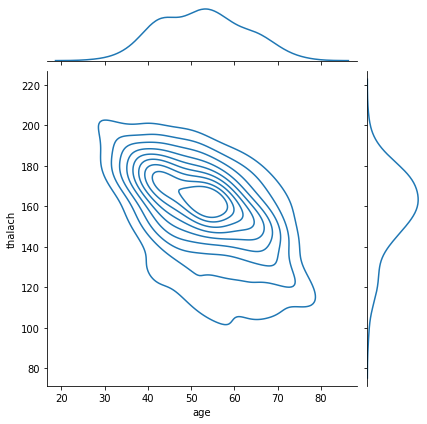

In [55]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='age', y='thalach', data=df_1, kind='kde')
plt.show()

<Figure size 720x432 with 0 Axes>

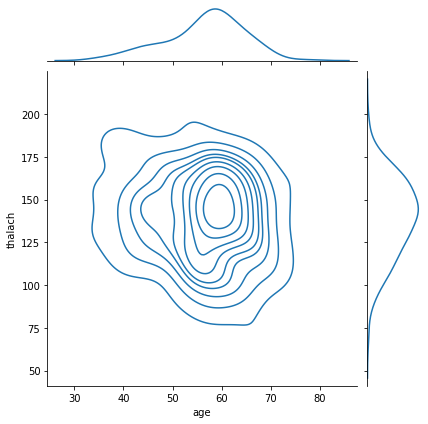

In [56]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='age', y='thalach', data=df_0, kind='kde')
plt.show()

### Observations

* No matter what the person's age is, if `cp` is very less then there are very negligible chances to get a heart stroke.
* Resting heart or healthy heart, the rate is optimal.
* A normal resting heart rate for adults ranges from 60 to 100 beats per minute.

We should also consider other important factors that influence heart rate. Like -

* Fitness and activity levels
* Being a smoker
* Having cardiovascular disease, high cholesterol or diabetes
* Air temperature
* Body position (standing up or lying down, for example)
* Emotions
* Body size
* Medications

### End